# Лабораторная работа 1
# Задача о падении тела. Построение графиков функций

Немчинович Виктория Дмитриевна, 20.02.2025

## Задание 1.1. Задача о падении тела

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$.

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы
тяжести $${\bf F} = m (0,-g),$$ где $m$ $-$ масса тела, $g$ $-$ ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.
 
**Задания для выполнения**.
- $\color{red}\text{Определите}$ функцию перемещения тела ($s_{x}(t)$, $s_{y}(t)$)под действием силы тяжести, где $s_{x}(t)$ и $s_{y}$($t$)$-$горизонтальная и вертикальная составляющая положения тела в момент времени $t$, соответственно.
- $\color{red}\text{Найдите}$ угол запуска тела $\alpha$.
- $\color{red}\text{Постройте}$ график траектории движения тела ($s_{x}(t)$, $s_{y}(t)$) для $t \in [0,T]$

# Выполнение задания 1.1

## Этап 1. Импортирование модулей

In [18]:
import math

In [19]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [21]:
import scipy.constants as const

In [22]:
import sympy

## Этап 2. Создание переменных 

In [24]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

In [25]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [26]:
print(h_start, h_end)

1 3.0


In [27]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Приведите}$ несколько примеров физических констант из модуля constants пакета расширений scipy

In [29]:
print(const.G, const.unit('Newtonian constant of gravitation'), '\n',
const.c, const.unit('speed of light in vacuum'))

6.6743e-11 m^3 kg^-1 s^-2 
 299792458.0 m s^-1


Создадим последовательность равномерно распределённых чисел на отрезке $[0,T]$ с шагом 0.01 двумя способами.

In [31]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0, T, step)

**Спецификации функций range и numpy.arange**
- Функция range может принимать аргументом start - начальное значение, end - конечное значение, step - шаг. Функция генерирует последовательность (списком) чисел от start до end с шагом step.
- Функция arange принимает те же самые аргументы, но генерирует с фиксированной размерностью массив.

## Этап 3. Определение функции перемещения и нахождения угла запуска тела.

Полагаем, что начало прямоугольной декартовой системы координат соответствует уровню земли. Тогда в начальный момент движения тела $t = 0$ имеем, что $$s_{x}(0) = 0, s_{y}(0) = h_{start}.$$
Для построения функции перемещения $(s_{x}(t), s_{y}(t))$ воспользуемся вторым законом Ньютона $$ma = F,$$ где $m$ - масса тела, ускорение движения тела $a = (s_{x}''(t), s_{y}''(t))$ и приложенная сила $F = m(0,-g)$. В результате имеем два уравнения, что $$s_{x}''(t)=0, s_{y}''(t)=-g.$$
На основании уравнений с учётом начальных условий можно записать аналитический вид для функций $s_{x}(t)$ и $s_{y}(t)$
$$s_{x}(t) = s_{x}(0) + \upsilon0_{x}t = 0 +  \upsilon0_{x}t,$$
$$s_{y}(t) = s_{y}(0) + \upsilon0_{y}t - \frac{g}{2}t^2 = h_{start} +  \upsilon0_{y}t - \frac{g}{2}t^2,$$где $\upsilon0 = (\upsilon0_{x}, \upsilon0_{y})$ обозначает неизвестную скорость движения тела в начальный момент времени $t = 0$

$\color{red}\text{Объяснение}$ как из второго закона Ньютона и начальных условий получен аналитический вид функции перемещения $(s_{x}(t), s_{y}(t))$:
- Горизонтальная и вертикальная составляющие являются независимыми. Горизонтальная составляющая является равномерным прямолинейным движением, вертикальная составляющая является равноускоренным прямоулинейным движением под действием силы тяжести $mg = F$.
- По условию на тело не действует никаких других сил, кроме как силы тяжести.
- Сила тяжести направлена по направлению к земле, поэтому берём вторую производную от расстояния со знаком минус (тело падает).
- Подставив начальные значения ($h_{start}$ и $s_{x}(0) = 0$ получим аналитическую функцию перемещений

Если начальный момент времени взять не $t = 0$, а $t = t^*$, то функция примет вид:
$$s_{x}(t) = s_{x}(t^*) + \upsilon(t^*)_{x}t$$
$$s_{y}(t) = s_{y}(t^*) + \upsilon(t^*)_{y}t - \frac{g}{2}t^2$$ 

Из условия задачи имеем, что $s_{x}(T) = s_{end}$. Из этого соотношения находим значение для для $\upsilon0_{x}$

In [38]:
v0_x = s_end/T
v0_x

1.6666666666666667

Из условия задачи имеем, что $s_{y}(T) = h_{end}$. Из этого соотношения находим значение для для $\upsilon0_{y}$

In [40]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела $\alpha$ определяем из соотношения $\tan\alpha = \frac{\upsilon0_{y}}{\upsilon0_{x}}$

In [42]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид:

In [44]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [45]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'


's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

## Этап 4. Построение графика траектории движения тела.

In [47]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

In [48]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

(0.0, 5.0, 0.0, 14.0)

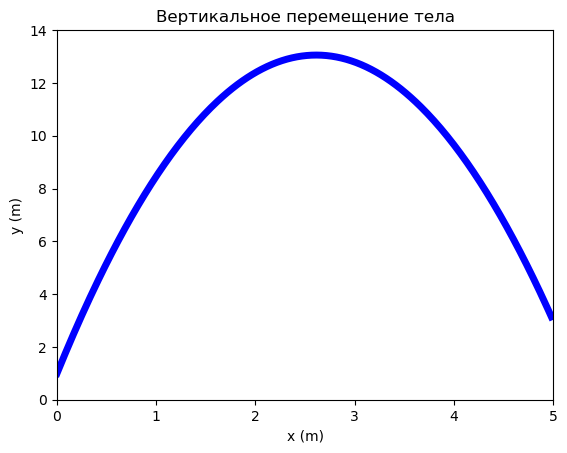

In [49]:
plt.figure()
plt.plot(s_x_list,s_y_list,'-b',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') 
plt.axis([0, s_end, 0, h_end+11])

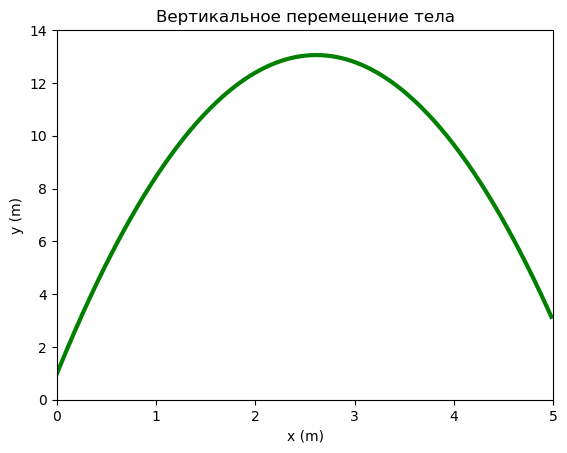

In [50]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

## Задание 1.2. Определение момента времени касания телом земли

*Подход 1* (**точное решение**): время касания телом земли находим как точное решение уравнения $s_{y}(t)$;

*Подход 2* (**приближенное решение**)
- Постройте последовательность $s_{y}$ на временном отрезке $[0, t_{stop}]$, чтобы момент касания тела земли $t^*$ попадал в выбранный отрезок, т.е. $t^* \in [0, t_{stop}]$. Отметим, что $t_{stop} > T$, где значение $T$ задаётся в Задании 1.1.
- Найдите в построенной последовательности $s_{y}$ два соседних элемента последовательности, значения которых меняют знак. Т. е. найдите значение индекса $k$, для которого $s_{y}[k]s_{y}[k+1]<0$. Это будет означать, что $0 \in (s_{y}[k],s_{y}[k+1])$.
- Постройте прямую линию $s_{lin}(t)$, проходящую через две точки $(t[k],s_{y}[k])$ и $(t[k+1],s_{y}[k+1])$ и найдите значение $t^* \in (t[k],t[k+1])$ из условия $s_{lin}(t^*)=0$. Найденное значение $t^*$ будет соответствовать точке $(t^*,0)$ на прямой $s_{lin}(t)$. $\color{red}\text{Приведите}$ в документе формулы для прямой $s_{lin}(t)$ и для вычисления $t^*$.
$\color{red}\text{Сравните}$ точное решение *(Подход 1)* и приближенное решение *(Подход 2)*, вычислив относительную ошибку.

Формула прямой $s_{lin}:$
$$\frac{x-t[k]}{t[k+1]-t[k]} = \frac{y-s_{y}[k]}{s_{y}[k+1]-s_{y}[k]}$$
Формула $t^*$:
$$t^* = \frac{-s_{y}[k]*(t[k+1]-t[k])}{s_{y}[k+1]-s_{y}[k]}+t[k]$$

Относительная ошибка двух подходов зависит от выбора шага интерполяции. В нашем случае ошибка составляет приблизительно $0.0002$%

# Выполнение Задания 1.2.

## Первый подход

In [56]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [57]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

**Спецификации функций sympy.symbols и sympy.solve:**

- Функция sympy.symbols принимает строку в качестве аргумента и создаёт за этой строкой символьную переменную, которую мы можем использовать в математических вычислениях
- Функция sympy.solve принимает некоторое уравнение, содержащее символьную переменную и решает уравнение относительно данной переменной

Примеры решений уравнений:

In [59]:
X, Y = sympy.symbols('X Y')
print(sympy.solve(X**2+2*X-3, X))
sympy.solve((X+Y-5, X-2*Y+1), (X,Y))

[-3, 1]


{X: 3, Y: 2}

## Второй подход

In [61]:
tVTOR_list = [0 + i*step for i in range(int(2*T/0.01))]
sVTOR_y_list = [h_start+v0_y*t-g*t**2/2 for t in tVTOR_list]

In [62]:
for i in range(len(sVTOR_y_list)):
    if sVTOR_y_list[i]*sVTOR_y_list[i+1]<0:
        print(list(enumerate(sVTOR_y_list))[i])
        K = i
        break

(319, 0.15476138416666174)


In [63]:
tVTOR = (-sVTOR_y_list[K]*(tVTOR_list[K+1]-tVTOR_list[K]))/(sVTOR_y_list[K+1]-sVTOR_y_list[K])+tVTOR_list[K]
tVTOR

3.199699499540028

In [64]:
rel_error = (t_star_exact-tVTOR)/t_star_exact
rel_error

2.79132127978774e-7

## Задание 1.3. Построение секущей, касательной и нормали к графику функции
$\color{red}\text{Постройте}$ в одной графической области:
- график траектории движения тела $(s_{x}(t),s_{y}(t))$ для $t \in [0,T]$ из Задания 1.1;
- график секущей прямой к траектории движения тела, проходящей через начальную точку при $t=0$ и конечную точку при $t=T$;
- график касательной прямой к траектории движения тела в начальной точке при $t=0$;
- график нормальной прямой к траектории движения тела в начальной точке при $t=0$.
  
Построение графиков функций осуществляется по координатам точек графика. Для построения графиков прямых линий (секущая, касательная, нормаль) используйте только две точки.

# Выполнение Задания 1.3.

Воспользуемся *векторно-параметрическим уравнением прямой* для заданной точки $p_{start}$, лежащей на прямой, и заданного направляющего вектора *a*
$$p(t) = p_{start} + at$$
Направляющий вектор можно определить, как $a = p_{end} - p_{start}$, где точка $p_{end}$ лежит на прямой и отлична от точки $p_{start}$.

In [68]:
p_start = np.array([s_x_array[0], s_y_array[0]])
p_end = np.array([s_x_array[-1], s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

In [69]:
a = p_end-p_start

In [70]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Для построения касательной прямой воспользуемся уравнением прямой по точке $p_{start}(x_{start}, y_{start})$ и угловому коэффициенту $k$:
$$y = k(x-x_{start})+y_{start}.$$
Угловой коэффициент определим как тангенс угла наклона касательной к графику в этой точке. С другой стороны угол наклона в начальной точке касательной является углом броска.

In [72]:
K = math.tan(alpha)
Kas = [(t, K*(t-s_x_array[0])+s_y_array[0]) for t in [-1, 3]]
Kas = np.array(Kas)

Преобразовав уравнение прямой по точке и угловому коэффициенту $k$ получим:
$$kx-y-(kx_{start}-y_{start}) = 0 \text{ - общее уравнение прямой},$$
Следовательно вектор нормали к данной прямой будет иметь координаты $n(k, -1)$
Воспользуемся векторно-параметрическим заданием прямой по точке $p_{start}$ и вектору нормали $n$:
$$n(t) = p_{start}+nt$$

In [74]:
nVEC = np.array([K, -1])
n = [p_start + nVEC*t for t in [-1, 2]]
n = np.array(n)

(-5.0, 10.0, 0.0, 14.0)

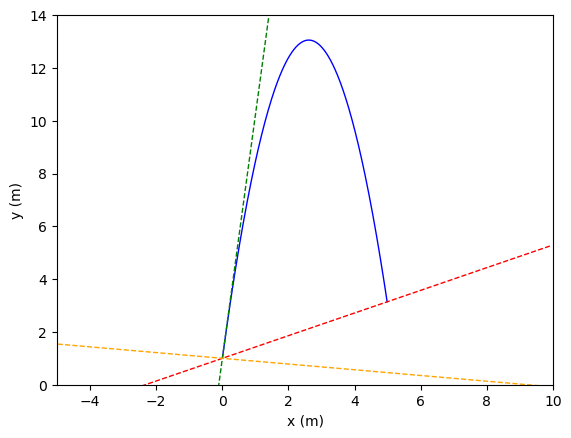

In [75]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, '-b', lw=1)
plt.plot(p[:,0],p[:,1], '--', color = 'red', lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.plot(Kas[:,0],Kas[:,1], '--', color = 'green', lw=1)
plt.plot(n[:,0],n[:,1], '--', color = 'orange', lw=1)

plt.axis([-5, s_end+5, 0, h_end+11])

## Задание 1.4. Построение графиков функций
$\color{red}\text{Постройте}$ графики функций на плоскости по координатам точек согласно варианту. Функция задана:

a) полярным уравнением $\rho=\rho(\varphi)$;

б) параметрическими уравнениями $x=x(t)$, $y=y(t)$ в декартовой системе координат $(x,y)$.

Построение графиков функций осуществляется по координатам точек графика. Для этого нужно создать последовательность значений $x(\varphi)$-координат точек графика функции и последовательность соответствующих значений $y(\rho)$-координат точек графика функции.

# Выполнение Задания 1.4.

## Полярное уравнение

а) $\rho=\frac{a}{m+nsin\varphi}, a \in \\R, m \in \\N, n \in \\Z$

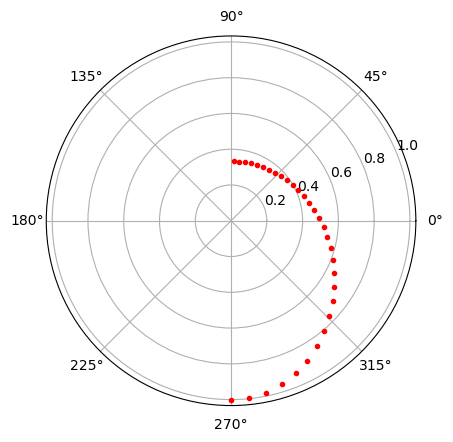

In [122]:
plt.figure()
plt.axes(projection = 'polar')
phi = np.arange(-np.pi/2, np.pi/2, 0.1)
rho = ([1/(2+math.sin(t)) for t in phi])
rho = np.array(rho)
plt.plot(phi + (rho<0)*np.pi, abs(rho), 'r.');

## Параметическое уравнение

 б) $x=ln\sqrt{\frac{1-t}{1+t}}, y=\sqrt{1-t^2}$

(-2.0, 2.0, 0.0, 2.0)

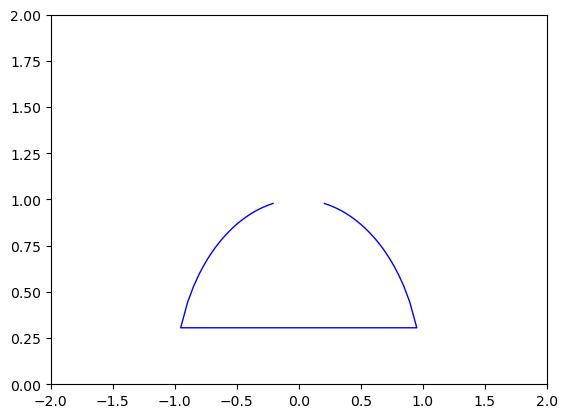

In [83]:
plt.figure()
step = 0.05
t_par = [-5+step + i*step for i in range (1, 73)]+[1.25+step + i*step for i in range (1, 73)]
x_par = [math.log(math.sqrt((t-1)/(t+1))) for t in t_par];
y_par = [math.sqrt(1-t**2) for t in x_par]

plt.plot(x_par, y_par,'b-',lw=1);
plt.axis([-2, 2, 0, 2])